# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The data file contains information about patients that may affect patients’ attendance of their appointments to know the reasons why patients do not attend their appointments that were chosen by themselves, the data contains information about gender, age, Neighbourhood, Scholarship, Handcap, SMS received, a group of diseases including: diabetes - Hipertension - Alcoholism, as well as the day and time of appointment.

To study the reasons for patients not attending, I wanted to know if sms received messages , ages, diabetes and gender affect attendance. This is to develop an appropriate solution or avoid these causes in the future.

**Questions asked:**

- Does receiving sms messages affect attendance?
- What is the age percentage of the attendees?
- What is the percentage of attendance for appointments by gender?
- How does diabetes affect attendance for appointments?

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [16]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
df.shape

(110527, 14)

In [18]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [19]:
type(df['Gender'][0])
type(df['ScheduledDay'][0])
type(df['AppointmentDay'][0])
type(df['Neighbourhood'][0])

str

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [21]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [22]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [23]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [24]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [25]:
df.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [26]:
df.tail(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [27]:
for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


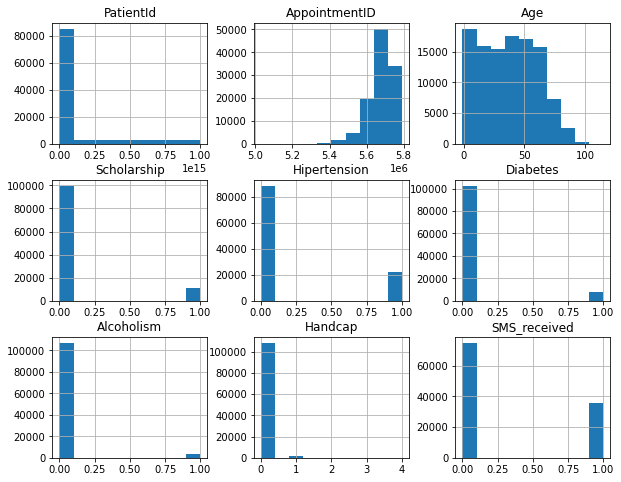

In [28]:
df.hist(figsize=(10,8));

### Data Cleaning

In [29]:
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [30]:
show = df.No_show == 'Yes'
noshow = df.No_show == 'No'

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does receiving sms messages affect attendance?)

In [31]:
df[noshow].count()

PatientId         88208
AppointmentID     88208
Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hipertension      88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS_received      88208
No_show           88208
dtype: int64

In [32]:
df[show].count()

PatientId         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hipertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No_show           22319
dtype: int64

In [33]:
df[show].mean()

PatientId        1.467523e+14
AppointmentID    5.652259e+06
Age              3.431767e+01
Scholarship      1.155070e-01
Hipertension     1.690040e-01
Diabetes         6.407097e-02
Alcoholism       3.033290e-02
Handcap          2.029661e-02
SMS_received     4.383709e-01
dtype: float64

In [34]:
df[noshow].mean()

PatientId        1.476845e+14
AppointmentID    5.681137e+06
Age              3.779006e+01
Scholarship      9.390305e-02
Hipertension     2.043919e-01
Diabetes         7.383684e-02
Alcoholism       3.041674e-02
Handcap          2.274170e-02
SMS_received     2.913341e-01
dtype: float64

In [35]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [36]:
df.groupby('No_show').mean().SMS_received

No_show
No     0.291334
Yes    0.438371
Name: SMS_received, dtype: float64

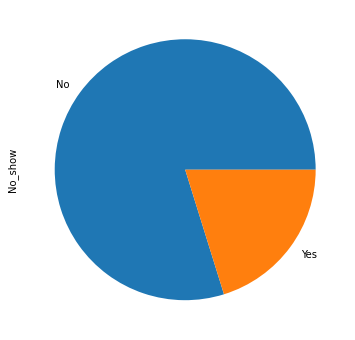

In [37]:
df['No_show'].value_counts().plot(kind='pie', figsize=(8,6));

In [38]:
df.groupby('SMS_received').mean('No_show')

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap
SMS_received,,,,,,,,
0,1.492131e+14,5.687885e+06,36.887961,0.098021,0.198961,0.074449,0.033487,0.024932
1,1.438652e+14,5.648697e+06,37.513810,0.098782,0.193619,0.066400,0.023871,0.016572


In [39]:
df.groupby(['No_show', 'SMS_received'], as_index=False).mean()

,No_show,SMS_received,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap
0,No,0,1.495170e+14,5.693529e+06,37.338154,0.095377,0.203231,0.075204,0.033803,0.025036
1,No,1,1.432270e+14,5.650992e+06,38.889330,0.090318,0.207215,0.070511,0.022181,0.017161
2,Yes,0,1.476974e+14,5.659743e+06,34.642920,0.111209,0.177663,0.070682,0.031911,0.024412
3,Yes,1,1.455415e+14,5.642671e+06,33.900961,0.121014,0.157911,0.055601,0.028312,0.015025


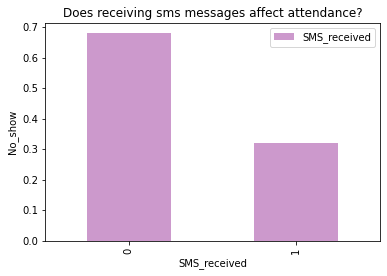

In [40]:
df['SMS_received'].value_counts('show', 'noshow').plot(kind='bar', color='purple', alpha=0.4)
plt.title("Does receiving sms messages affect attendance?")
plt.xlabel("SMS_received")
plt.ylabel("No_show")
plt.legend();

- The number of those who did not receive sms messages is less than those who received, yet Some patients who received sms messages did not attend while patients who did not receive sms messages attend to the appointment

### Research Question 2  (What is the age percentage of the attendees?)

In [41]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [42]:
df.groupby('Age').mean('No_show')

,PatientId,AppointmentID,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,,,,,,,,
-1,4.659432e+14,5.775010e+06,0.000000,0.0,0.000000,0.0,0.000000,0.000000
0,1.539027e+14,5.671375e+06,0.014693,0.0,0.000000,0.0,0.000283,0.253461
1,1.580224e+14,5.678714e+06,0.036076,0.0,0.000440,0.0,0.000440,0.249010
2,1.437773e+14,5.681502e+06,0.073548,0.0,0.000618,0.0,0.000618,0.242892
3,1.447703e+14,5.678064e+06,0.089888,0.0,0.000000,0.0,0.000000,0.267019
...,...,...,...,...,...,...,...,...
98,9.213857e+13,5.564189e+06,0.000000,1.0,0.333333,0.0,0.000000,0.333333
99,3.661577e+10,5.775674e+06,0.000000,1.0,1.000000,0.0,0.000000,0.000000
100,1.891399e+13,5.721921e+06,0.000000,0.0,0.000000,0.0,0.500000,0.250000


In [43]:
df.groupby('No_show').mean().Age

No_show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

In [44]:
df.Age[show].count()

22319

In [45]:
df.Age[noshow].count()

88208

In [46]:
df.Age[show].mean()

34.31766656212196

In [47]:
df.Age[noshow].mean()

37.790064393252315

In [76]:
list(filter(lambda x: x>100,df['Age']))

[102, 115, 115, 115, 115, 102, 115]

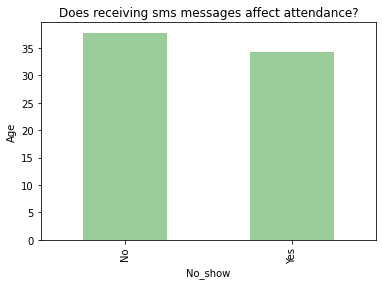

In [49]:
mean = df.groupby('No_show')['Age'].mean()
mean.plot(kind='bar', title='Does receiving sms messages affect attendance?', color='green', alpha=0.4)
plt.xlabel('No_show')
plt.ylabel('Age');

- It appears that the average age of the attendees was 34 years, while the average age of the non-attendants was 37 years

### Research Question 3 (What is the percentage of attendance for appointments by gender?)

In [50]:
df_f = df[df['Gender'] == 'F']

In [51]:
df_m = df[df['Gender'] == 'M']

In [52]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [53]:
df.Gender[show].count()

22319

In [54]:
df.Gender[noshow].count()

88208

In [55]:
df_f.groupby('No_show').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No_show,,,,,,,,,
No,1.462178e+14,5.680200e+06,39.590417,0.117860,0.221535,0.080163,0.015984,0.019792,0.305384
Yes,1.452126e+14,5.651340e+06,36.162190,0.144306,0.182061,0.069686,0.021105,0.018569,0.460463


In [56]:
df_m.groupby('No_show').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No_show,,,,,,,,,
No,1.503964e+14,5.682868e+06,34.461372,0.049609,0.172696,0.062141,0.057102,0.028196,0.265358
Yes,1.496610e+14,5.653994e+06,30.833010,0.061100,0.144337,0.053463,0.047767,0.023560,0.396634


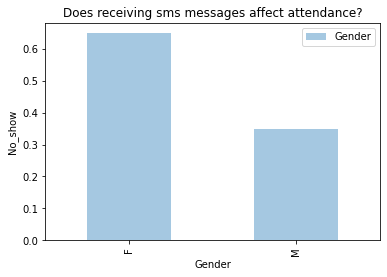

In [57]:
df['Gender'].value_counts('show', 'noshow').plot(kind='bar', alpha=0.4)
plt.title("Does receiving sms messages affect attendance?")
plt.xlabel("Gender")
plt.ylabel("No_show")
plt.legend();

- Based on gender, nearly 2,000 patients attended, but more than 8,000 patients did not attended, and the majority of attendees was males.

### Research Question 4 (How does diabetes affect attendance for appointments?)

In [58]:
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

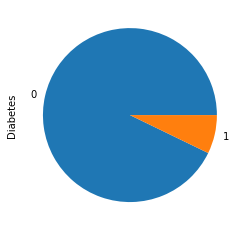

In [59]:
df['Diabetes'].value_counts().plot(kind='pie');

In [60]:
df.Diabetes[show].count()

22319

In [61]:
df.Diabetes[noshow].count()

88208

In [62]:
df.Diabetes[show].mean()

0.06407097092163627

In [63]:
df.Diabetes[noshow].mean()

0.0738368401959006

In [64]:
df.groupby('No_show').mean().Diabetes

No_show
No     0.073837
Yes    0.064071
Name: Diabetes, dtype: float64

In [65]:
df.groupby('Diabetes').mean('No_show')

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Alcoholism,Handcap,SMS_received
Diabetes,,,,,,,,
0,1.473819e+14,5.674856e+06,35.208610,0.100328,0.149292,0.029517,0.019662,0.322916
1,1.489737e+14,5.681103e+06,61.372529,0.071635,0.816568,0.041798,0.055646,0.296613


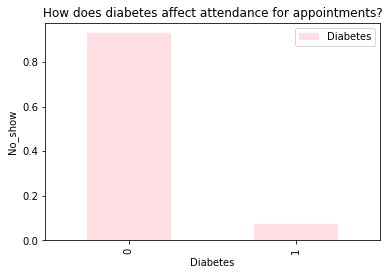

In [66]:
df['Diabetes'].value_counts('show', 'noshow').plot(kind='bar', color='pink', alpha=0.5)
plt.title("How does diabetes affect attendance for appointments?")
plt.xlabel("Diabetes")
plt.ylabel("No_show")
plt.legend();

- The greater proportion of patients with diabetes did not attend their appointments compared to patients without diabetes.

<a id='conclusions'></a>
## Conclusions

- Despite the higher percentage of not receiving SMS messages, four times the number of messages received, the attendance rate for appointments was higher with an average of 0.43 and the average for non-attendance was 0.29.

- The average age of the attendees was 34 years, while the average of non-attendants were about 37 years old.

- The higher percentage for gender were male in attendance for their appointments compared to female.

- The number of diabetic patients is less than the non-diabetic, indicating that the number of non-attendance is greater than the attending patients with an average of 0.064 for attendance and 0.073 for non-attendance.

## limitations 

The study lacks some information that could be a reason for patients not attending their appointments. Including information about the availability of transportation or the type of transportation used, and whether the elderly have Alzheimer’s disease and need someone to remind them or accompany them to their appointments, also information about the patients’ work that requires them to be brought to work at any time, which affects their attendance at the appointment.

In [68]:
df.to_csv('noshowappointments-kagglev2-may-2016.csv', index=False)